In [1]:
import os
from scipy import misc
from scipy import arange
import matplotlib
import numpy as np
from skicaffe import SkiCaffe
matplotlib.use('AGG') 
import pandas as pd
import matplotlib.pyplot as plt
import Image
%matplotlib inline

### Using SkiCaffe to Feature Extract

In [8]:
import sys
caffe_root = '/home/bhedayat/Public/caffe/'
sys.path.insert(0, caffe_root + 'python')

import caffe
#Specify which deploy prototext and which caffe model you want, also layer
model_prototxt = 'Caffe models/VGG/VGG_CNN_S_deploy.prototxt'
model_trained =  'Caffe models/VGG/weights/caffe_vgg_train_iter_900.caffemodel'
label_path = 'kaggle/labels.txt'
mean_path = 'kaggle/draper_mean.binaryproto'

# IF you have your own mean file
DLmodel = SkiCaffe(caffe_root = caffe_root,model_prototxt_path = model_prototxt, model_trained_path = model_trained,
                   mean_path = mean_path, labels_path = label_path, layer_name = 'refc8')

# If you want to use ImageNet mean file
#DLmodel = SkiCaffe(caffe_root = caffe_root,model_prototxt_path = model_prototxt, model_trained_path = model_trained,
#                  layer_name = 'pool5')


In [9]:
DLmodel.fit() #Calling model
print 'Number of layers:', len(DLmodel.layer_sizes) 
#DLmodel.layer_sizes #Displaying network structure

caffe imported successfully
Number of layers: 15


In [32]:
val = np.loadtxt('val.txt',dtype='str',delimiter=' ')

In [33]:
#Grab image paths put in list
path = 'kaggle/train_sm/'
img_paths = []
for i in val:
    img_paths.append(path + i[0])
print len(img_paths)


688


In [4]:
#Same images to do nearest neighbors
path = 'kaggle/train/train_sm/'
img_paths = []
for i in sorted(os.listdir(path)):
    img_paths.append(path+i)
print len(img_paths)

350


#### Sent through model to extract Features

In [5]:
dataframe = DLmodel.transform(X = img_paths[:20])

In [21]:
image_features.shape

(350, 344)

In [40]:
np.savetxt("Features Extracted/Kaggle validation/500AlexNetrefc8orig.csv", image_features, delimiter=",")

In [36]:
pred = np.array(dataframe[0],dtype=int)-1

In [22]:
val

array([['set100_4.jpeg', '100'],
       ['set100_5.jpeg', '100'],
       ['set101_4.jpeg', '101'],
       ..., 
       ['set99_5.jpeg', '99'],
       ['set9_4.jpeg', '9'],
       ['set9_5.jpeg', '9']], 
      dtype='|S13')

#### Perform Nearest Neighbours evaluation 
Each location has a set of 5 images. For one image in the set pick that image and perform nearest neighbours on the rest of the images.
The 4 closest images returned should be the same 4 images from that set. Find how many are in common and divide that by 4. Do that for each location.


In [22]:
#Nearest Neighbours on all images LOOCV
lin = range(0,image_features.shape[0],5)
acc = np.zeros((len(lin)))
for a in range(len(lin)):
    x = np.linalg.norm((image_features[lin[a],:] - image_features),axis=1)
    y = np.sort(x)
    sort_index = np.argsort(x)
    d = y[0:5]
    idx = sort_index[0:5]
    target = range(lin[a],lin[a]+5)
    inter = np.intersect1d(target[1:],idx[1:])
    acc[a] = inter.shape[0]/4.0

In [23]:
np.mean(acc)

0.45000000000000001

### Sending UC Merced Images to Feature Extract

In [10]:
#Grab image paths put in list
path = 'UCMerced/Images/'
img_paths = []
label = []
for i in sorted(os.listdir(path)):
    for j in sorted(os.listdir(path+i)):
        img_paths.append(path + i + '/'+ j)
        label.append(j)
print len(img_paths)

2100


In [11]:
dataframe1 = DLmodel.transform(X = img_paths)

In [12]:
image_features = dataframe1[1]
image_features.shape

(2100, 344)

In [32]:
image_features = np.genfromtxt ('Features Extracted/UCMerced/Finetune/Single/UCM-VGGCaffe-refc8.csv', delimiter=",")

In [35]:
image_features = image_features[1:,1:]

### Save as Pandas Dataframe

In [13]:
#np.savetxt('test.csv', image_features[1], delimiter=',')
df1 = pd.DataFrame(np.array(label))
df2 = pd.DataFrame(image_features)

In [14]:
frames = [df1, df2]
result = pd.concat(frames,axis=1)

In [15]:
result.head()

,0,0,1,2,3,4,5,6,7,8,...,334,335,336,337,338,339,340,341,342,343
0,agricultural00.tif,0.946235,1.030498,0.898138,1.150152,1.065596,0.917944,0.939433,0.953776,1.086030,...,0.957576,1.089319,1.065341,0.973886,1.045439,1.025247,1.174775,0.954651,1.043507,1.057201
1,agricultural01.tif,0.946507,1.060595,0.878008,1.159675,1.050147,0.923151,0.949911,0.973858,1.089424,...,0.919490,1.086226,1.079319,0.951046,1.031299,0.998456,1.189871,0.943276,1.035779,1.063265
2,agricultural02.tif,0.961766,1.055779,0.903289,1.110943,1.058430,0.941561,0.931594,0.969891,1.132722,...,0.911914,1.067518,1.107916,0.934373,1.036289,1.054119,1.203782,0.946681,1.064551,1.066189
3,agricultural03.tif,0.948614,1.051583,0.876057,1.138046,1.042528,0.919195,0.939893,0.972520,1.078920,...,0.947991,1.070118,1.082180,0.970282,1.033854,1.004663,1.179627,0.948583,1.038661,1.050219
4,agricultural04.tif,0.966402,0.994531,1.029453,1.106425,1.094501,0.932725,0.950367,0.944330,1.036466,...,0.952698,0.987855,1.022561,0.990287,0.976540,1.071111,1.052742,1.051731,0.872228,0.919054


In [16]:
result.to_csv('Features Extracted/UCMerced/Finetune/Single/UCM-VGGCaffe-refc8.csv',index=False)

### Initial Nearest Neighbours evaluation 
50 random locations were generated to help split the dataset into a train and validation set. Nearest Neighbour evaluation done on train set and then validated

In [84]:
#Generate 50 random locations
random.shuffle(lin)
ridx = lin[0:50]
random_train = np.concatenate((ridx,ridx + 1,ridx + 2,ridx + 3,ridx + 4))
r_train = np.sort(random_train)
r_train

array([  0,   1,   2,   3,   4,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 205, 206, 207, 208, 209, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 235, 236, 237, 238, 239, 24

In [16]:
#Split dataset into train and test set
lin = np.array(range(0,350))
r_test = np.array(list(set(lin).symmetric_difference(r_train)))
img_train = img_paths[r_train]
img_test = img_paths[r_test]


In [119]:
#Send images through network to get features
image_features = DLmodel.transform(X = img_test)

In [120]:
image_features.shape

(100, 4096)

In [121]:
np.savetxt("Features Extracted/Kaggle test/CaffeNetfc7.csv", image_features, delimiter=",")

In [67]:
#If you want to import any new feature sets from saved folders
image_features = np.genfromtxt('Features Extracted/Kaggle test/VGGNetfc6.csv', delimiter=',')
image_features.shape

(100, 4096)

In [62]:
total_acc = []
total_std = []

In [68]:
#Nearest Neighbours on all images LOOCV
lin = range(0,image_features.shape[0],5)
acc = np.zeros((len(lin)))
for a in range(len(lin)):
    x = np.linalg.norm((image_features[lin[a],:] - image_features),axis=1)
    y = np.sort(x)
    sort_index = np.argsort(x)
    d = y[0:5]
    idx = sort_index[0:5]
    target = range(lin[a],lin[a]+5)
    inter = np.intersect1d(target[1:],idx[1:])
    acc[a] = inter.shape[0]/4.0

In [69]:
total_acc.append(np.mean(acc))
total_std.append(np.std(acc))

In [70]:
total_acc

[0.66249999999999998, 0.6875]

In [71]:
total_std

[0.2880429655450728, 0.23551804601770965]

### Plotting Tools

In [109]:
#Round the accuracies for plotting
round_acc = []
for i in total_acc:
    round_acc.append(round(i,2)) 

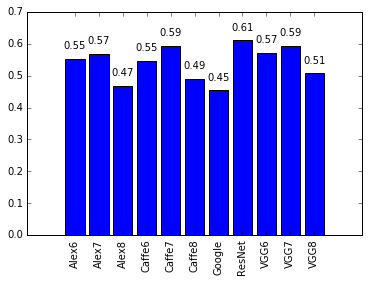

In [530]:
#Plotting
fig, ax = plt.subplots()
plt.bar(arange(len(total_acc)),total_acc,align='center')

labels = ['Alex6', 'Alex7','Alex8','Caffe6','Caffe7', 'Caffe8','Google','ResNet','VGG6', 'VGG7', 'VGG8']
ax.set_xticks(arange(len(total_acc)))
ax.set_xticklabels(labels,rotation='vertical')

rects = ax.patches

for rect, label in zip(rects, round_acc):
    height = rect.get_height()
    ax.text(rect.get_x()+0.4, height+0.025, label, ha='center', va='bottom')

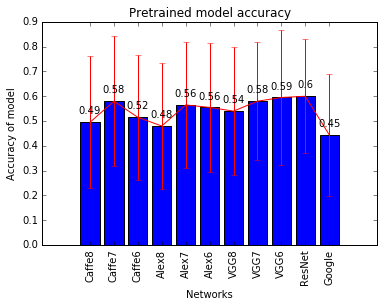

In [93]:
fig, ax = plt.subplots()
plt.bar(arange(len(total_acc)),total_acc,align='center')
plt.errorbar(arange(len(total_acc)),total_acc,total_std,color = 'red')
labels = ['Caffe8','Caffe7', 'Caffe6','Alex8', 'Alex7','Alex6','VGG8', 'VGG7', 'VGG6','ResNet','Google']
ax.set_xticks(arange(len(total_acc)))
ax.set_xticklabels(labels,rotation='vertical')

rects = ax.patches
plt.ylabel('Accuracy of model')
plt.xlabel('Networks')
plt.title('Pretrained model accuracy')
for rect, label in zip(rects, round_acc):
    height = rect.get_height()
    ax.text(rect.get_x()+0.4, height+0.025, label, ha='center', va='bottom')
plt.savefig('Validation on Networks.png')

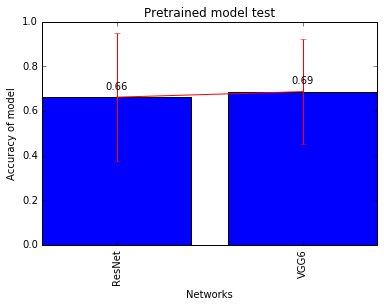

In [110]:
fig, ax = plt.subplots()
plt.bar(arange(len(total_acc)),total_acc,align='center')
plt.errorbar(arange(len(total_acc)),total_acc,total_std,color = 'red')
labels = ['ResNet','VGG6']
ax.set_xticks(arange(len(total_acc)))
ax.set_xticklabels(labels,rotation='vertical')

rects = ax.patches
plt.ylabel('Accuracy of model')
plt.xlabel('Networks')
plt.title('Pretrained model test')
for rect, label in zip(rects, round_acc):
    height = rect.get_height()
    ax.text(rect.get_x()+0.4, height+0.025, label, ha='center', va='bottom')
plt.savefig('Tested on Networks.png')